In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [11]:
h5 = '../cerberus/cerberus_annot.h5'
h5_trip = 'cerberus_annot_triplets.h5'
ab = '../talon/mouse_talon_abundance.tsv'
filt_ab = '../cerberus/cerberus_filtered_abundance.tsv'
swan_file = '..//swan/swan.p'

obs_col = 'sample'
species='mouse'
min_tpm = 1
major_set = '../swan/isos_sample_gene_90.tsv'
gene_subset = 'polya'

In [12]:
ca = cerberus.read(h5_trip)
sg = swan.read(swan_file)

Read in graph from ..//swan/swan.p


In [4]:
c_dict, order = get_lr_bulk_sample_colors()
c_dict[np.nan] = 'k'


mmap = {'vM25': '*', 'obs_det': '^', 'cerberus': '2'}
subset = {'source': ['vM25', 'obs_det', 'sample_det']}

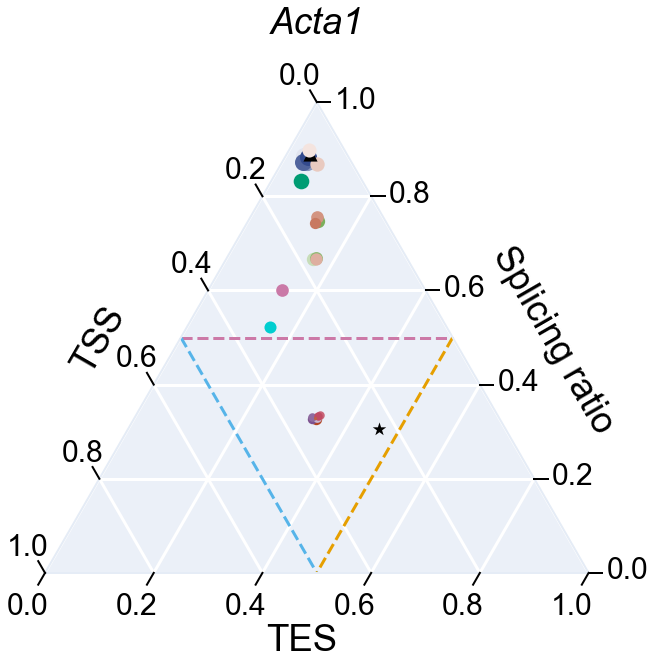

In [6]:
# Ctcf
df = ca.plot_simplex(top='splicing_ratio', 
            gene='Acta1',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=1,
            order_marker_sizes=True,
            fname='figures/simplex_acta1.pdf')

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1817: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 149463
# isos >= 1 tpm: 138642
Applying gene type and novelty subset
Number of isos reported: 135450
Found 37 total samples
small text size: 20.3
big text size: 17.571194762684122


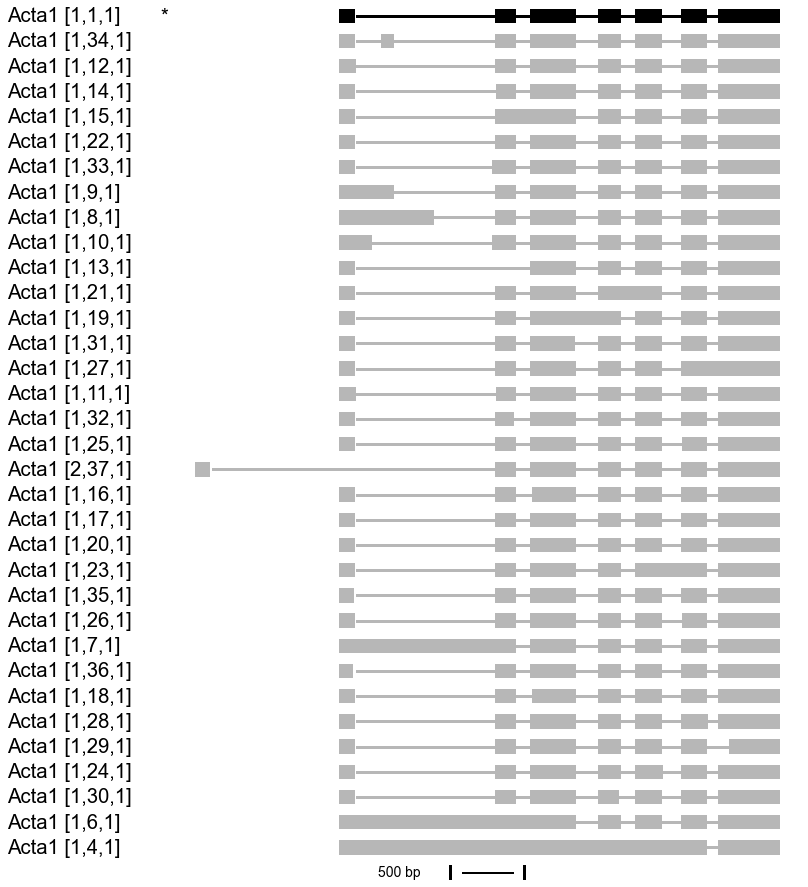

In [15]:
gene = 'Acta1'
obs_col = 'sample'
obs_condition = 'gastroc_10d'
ax, tpm_df = plot_browser_isos(ca, sg, gene,
                             obs_col, obs_condition,
                             filt_ab, major_set,
                             h=0.2, ref_source='vM25', species='mouse')

In [9]:
ca.triplets.loc[(ca.triplets.gname=='Acta1')&(ca.triplets.source=='sample_det')].sort_values(by='gene_tpm')

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,gname,sample,gene_tpm,tissue
200580,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,adrenal_2mo,0.692668,NaN
200599,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,hippocampus_18-20mo,8.322279,NaN
200600,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,hippocampus_2mo,8.378057,NaN
200587,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,cortex_2mo,8.736722,NaN
200585,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,cortex_14d,10.428363,NaN
200586,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,cortex_18-20mo,16.857038,NaN
200581,sample_det,ENSMUSG00000031972,1.0,1.0,6.0,6.0,6.000000,0.125000,0.125000,0.750000,Acta1,adrenal_36d,75.661102,NaN
200578,sample_det,ENSMUSG00000031972,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,Acta1,adrenal_18-20mo,85.873413,NaN
200588,sample_det,ENSMUSG00000031972,2.0,1.0,5.0,5.0,3.333333,0.315789,0.157895,0.526316,Acta1,forelimb_e13,159.704865,NaN
200577,sample_det,ENSMUSG00000031972,1.0,1.0,4.0,4.0,4.000000,0.166667,0.166667,0.666667,Acta1,adrenal_14d,197.895752,NaN


0.4
12.0
(2.1431999999999998, 2.0)


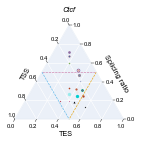

In [13]:
# Ctcf
df = ca.plot_simplex(top='splicing_ratio', 
            gene='Ctcf',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.2,
            order_marker_sizes=True,
            fname='figures/simplex_ctcf.pdf')

0.4
12.0
(2.1431999999999998, 2.0)


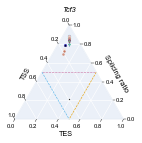

In [14]:
# Tcf3
df = ca.plot_simplex(top='splicing_ratio', 
            gene='Tcf3',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.2,
            order_marker_sizes=True,
            fname='figures/simplex_tcf3.pdf')